In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cs-training.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [3]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Observations:
- Very unbalanced classes - will need to address this in modeling process.
- Large variance in DebtRatio and MonthlyIncome. 
- Also larger scale compared to other attributes - may need to consider scaling but RF should be robust to this.
- Max for RevolvingUtilizationofUnsecuredLines is >50K. This is a ratio so ideally should be not much more than 1 (eg may exceed if the person overdrafts and/or delays in updates to limits)
- Age: at least 1 person whose age is 0 - need to correct for this
- Max of NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse is 98. This may be real but some data collection systems also use 98 to indicate "not applicable" and "refuse to answer"... investigate this
- DebtRatio also has a very large number - Investigate this

In [4]:
# Limiting to 100K to save remaining 50K for ongoing model testing
df1 = df[:100000]

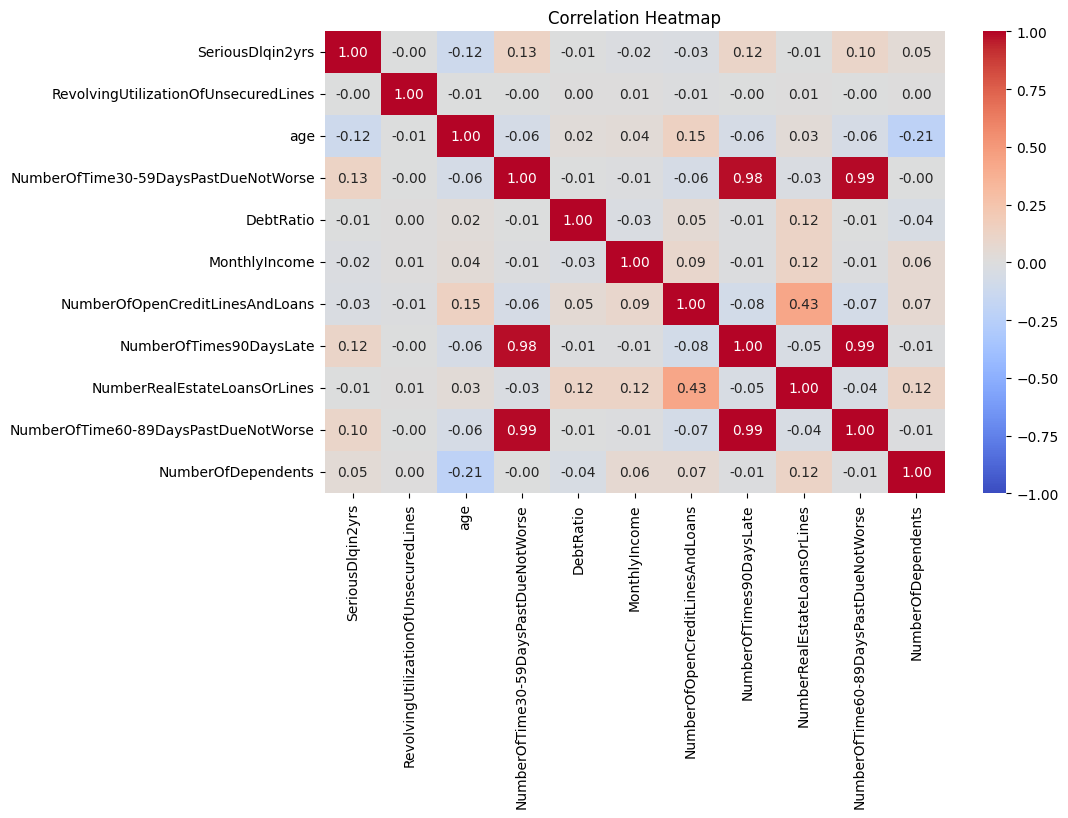

In [5]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Strong correlation between `NumberOfTime30-59DaysPastDueNotWorse`,`NumberOfTime60-89DaysPastDueNotWorse` and `NumberofTimes90DaysLate`. Can drop 2 of these from analysis.

In [46]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Bad pipe message: %s [b'\xed\x8b\xe7M\x94\xaf\xdfq5\xdd\xe9\xb9j\x9bQ\xfbW\xfb \xb6V\x07B\xc82\xbei']
Bad pipe message: %s [b'q\x04\xeeU\xb8f\x8b\xde\xa1\xdb\xea\xc8q\x14V\x02F\x17 \xfa\xdf\xeb\x8c\x14a\x03', b'\xa2\xd3"\xc8\xb2q\x8ek(\xfe\x06 \x8c?CQ\x8d0~\xbfN\x85\x91\x00 **\x13\x01\x13\x02\x13\x03\xc0+\xc0/\xc0,\xc00\xcc\xa9\xcc\xa8\xc0\x13\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x06S\x9a\x9a\x00\x00\x00\r\x00\x12\x00\x10\x04\x03\x08\x04\x04\x01\x05\x03\x08\x05\x05\x01\x08\x06\x06\x01\x00\x10\x00\x0e\x00\x0c\x02h2\x08http/1.1\x00\x05\x00\x05\x01\x00\x00\x00\x00\x00\x12\x00\x00\x00-\x00\x02\x01\x01\xff\x01\x00\x01\x00\x00\x17\x00\x00D\xcd\x00\x05\x00\x03\x02h2\x00#\x00\x00\xfe\r\x00\xda\x00\x00\x01\x00\x01\x86\x00 \x13\x97k!A\x99\xe0\x8d\x1a\xf1\x8e\x83\xadBp\x1d2*', b'qa\xdf\x96\xe9"\xa8\xefE\xce\x9f\t\x00\xb0\xfc\x1a\x14\xbb\xaci\xec\x1a\x85Q\x99(S\x8a\\>,o\xa2\x97\xd6T\xf0$\'\xf9z\x0b\xf7f\xb1', b'\xdf\xf6\x11d\xab\xebz\x03b\xb2\x16\xdc\xbf\xbf\xdd\xd5\x0b\xfec', b'\xefw\x9e\xef

In [6]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [8]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: count, dtype: int64

In [7]:
df['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64

In [20]:
def find_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return upper_bound, lower_bound

In [21]:
find_outliers(df, 'RevolvingUtilizationOfUnsecuredLines')

(np.float64(1.35281445575), np.float64(-0.7639007662499999))

In [22]:
find_outliers(df, 'NumberOfTime30-59DaysPastDueNotWorse')

(np.float64(0.0), np.float64(0.0))

In [23]:
find_outliers(df, 'DebtRatio')

(np.float64(1.9080236847499998), np.float64(-0.8646960792499998))

Since DebtRatio can technically end up above 1 (spending more than income), we want to allow for high values (within a reasonable range). Consider
windsorizing to replace very large values with a cap

In [44]:
df[(df['DebtRatio'] > 5)&(df['DebtRatio'] < 20)].sort_values('MonthlyIncome', ascending=True)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
80099,0,0.028219,32,0,7.0,0.0,1,0,0,0,0.0
62260,0,0.922156,22,0,13.0,0.0,1,0,0,0,0.0
127121,0,0.270729,24,0,8.0,0.0,1,0,0,0,0.0
128760,0,0.355644,26,0,10.0,0.0,2,0,0,0,0.0
103152,0,0.292707,21,0,8.0,0.0,2,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149796,0,0.006297,75,0,6.0,NaN,4,0,0,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149912,0,0.052186,71,0,16.0,NaN,2,0,0,0,0.0
149918,0,0.015699,77,0,9.0,NaN,2,0,0,0,0.0


In [42]:
df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64